In [37]:
import pandas as pd
import numpy as np
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv(r'D:\5th Sem\Machine Intelligence\mbti_1.csv') #converting to dataframe data
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [12]:
data.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [13]:
_classes = data.type.unique()
print(_classes)

['INFJ' 'ENTP' 'INTP' 'INTJ' 'ENTJ' 'ENFJ' 'INFP' 'ENFP' 'ISFP' 'ISTP'
 'ISFJ' 'ISTJ' 'ESTP' 'ESFP' 'ESTJ' 'ESFJ']


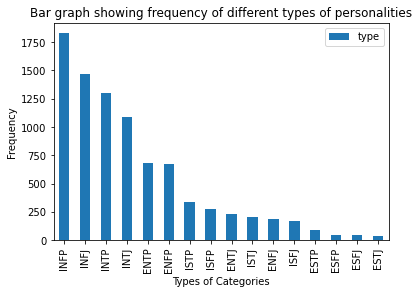

In [14]:
pd.DataFrame(data.type.value_counts()).plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Types of Categories')
plt.title('Bar graph showing frequency of different types of personalities')
plt.show()

D:\Users\AnanyaS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of lengths of the post')

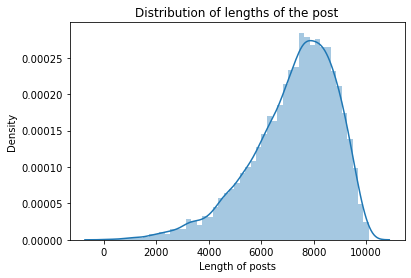

In [15]:
sns.distplot(data["posts"].apply(len))
plt.xlabel("Length of posts")
plt.ylabel("Density")
plt.title("Distribution of lengths of the post")

In [19]:
def show_class_distribution(data, x="type", figsize=(16,4), title="Distribution of Personality Types", xticks_size=10, palette="husl"):
    plt.figure(figsize=figsize)
    sns.countplot(x=x, data=data, palette=palette)
    plt.xlabel("Personality Types", size=15)
    plt.ylabel("Counts", size=15)
    plt.xticks(size=xticks_size)
    plt.title(title, size=20)
    plt.show()

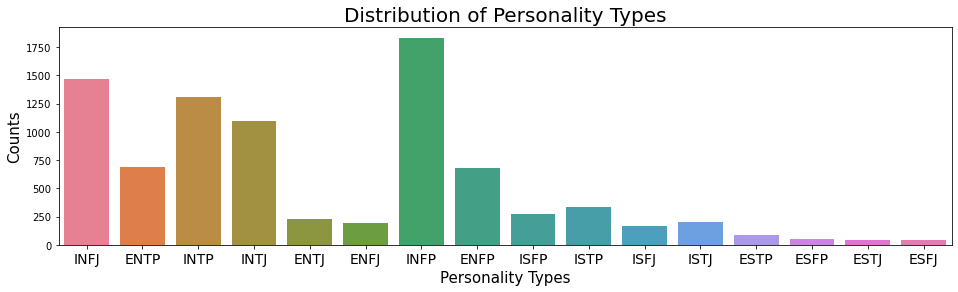

In [20]:
show_class_distribution(data, xticks_size=14)

In [39]:
data.loc[8, "posts"]

"I'm not sure, that's a good question. The distinction between the two is so dependant on perception. To quote Robb Flynn, ''The hate you feel is nothing more, than love you feel to win this war.''|||Good question! It's tough to say for sure but I loved Winona Ryder as Lydia in Beetlejuice...  http://i63.photobucket.com/albums/h158/trinsghost/Misc-Images/2921aa070866f20450f8e1160b1e5d41.jpg|||https://www.youtube.com/watch?v=r5If816MhoU|||https://www.youtube.com/watch?v=Q-sQklvpDhA|||I've been lonely for much of my time. For a while now I've been working on changing ''how to think'', and one way is trying to find the positive in everything, no matter how bleak it might seem. I...|||I hope I can look back at this current stretch of time and think, ''Thank God I'm not there anymore and things are so much better''. What an ass-kickin' I'm taking.|||Help or a voice of reason, other than my own distorted, in my life. I'm completely frusterated and feel like I'm on the brink. I'm carrying the

In [42]:
#CLEANING
data["posts"] = data["posts"].str.lower()
print(data.loc[0, "posts"])

' ||| |||enfp and intj moments     sportscenter not top ten plays     pranks|||what has been the most life-changing experience in your life?|||       on repeat for most of today.|||may the perc experience immerse you.|||the last thing my infj friend posted on his facebook before committing suicide the next day. rest in peace~    |||hello enfj7. sorry to hear of your distress. it's only natural for a relationship to not be perfection all the time in every moment of existence. try to figure the hard times as times of growth, as...|||84389  84390       ...|||welcome and stuff.|||   game. set. match.|||prozac, wellbrutin, at least thirty minutes of moving your legs (and i don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...|||basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types' cognitive functions and whatnot, when le

In [43]:
for i in range(len(data)):
  post_temp=data._get_value(i, 'posts')
  pattern = re.compile(r'https?://[a-zA-Z0-9./-]*/[a-zA-Z0-9?=_.]*[_0-9.a-zA-Z/-]*')    #to match url links present in the post
  post_temp= re.sub(pattern, ' ', post_temp)                                            #to replace that url link with space
  data._set_value(i, 'posts',post_temp)
print(data.loc[0, "posts"])

' ||| |||enfp and intj moments     sportscenter not top ten plays     pranks|||what has been the most life-changing experience in your life?|||       on repeat for most of today.|||may the perc experience immerse you.|||the last thing my infj friend posted on his facebook before committing suicide the next day. rest in peace~    |||hello enfj7. sorry to hear of your distress. it's only natural for a relationship to not be perfection all the time in every moment of existence. try to figure the hard times as times of growth, as...|||84389  84390       ...|||welcome and stuff.|||   game. set. match.|||prozac, wellbrutin, at least thirty minutes of moving your legs (and i don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...|||basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types' cognitive functions and whatnot, when le

In [24]:
for i in range(len(data)):
  post_temp=data._get_value(i, 'posts')
  pattern = re.compile(r'[0-9]')                                    #to match numbers from 0 to 9
  post_temp= re.sub(pattern, ' ', post_temp)                        #to replace them with space
  pattern = re.compile('\W+')                                       #to match alphanumeric characters
  post_temp= re.sub(pattern, ' ', post_temp)                        #to replace them with space
  pattern = re.compile(r'[_+]')
  post_temp= re.sub(pattern, ' ', post_temp)
  data._set_value(i, 'posts',post_temp)

In [25]:
for i in range(len(data)):
  post_temp=data._get_value(i, 'posts')
  pattern = re.compile('\s+')                                     #to match multiple whitespaces
  post_temp= re.sub(pattern, ' ', post_temp)                      #to replace them with single whitespace
  data._set_value(i, 'posts', post_temp)

In [26]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ananya
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
remove_words = stopwords.words("english")
for i in range(data.shape[0]):
  post_temp=data._get_value(i, 'posts')
  post_temp=" ".join([w for w in post_temp.split(' ') if w not in remove_words])    #to remove stopwords and give one space between words. 
  data._set_value(i, 'posts', post_temp)

In [28]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Ananya
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Ananya
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [30]:
for i in range(data.shape[0]):
  post_temp=data._get_value(i, 'posts')
  post_temp=" ".join([lemmatizer.lemmatize(w) for w in post_temp.split(' ')])   #to implement lemmetization i.e. to group together different forms of a word
  data._set_value(i, 'posts', post_temp)

In [31]:
print(data)

      type                                              posts
0     INFJ   enfp intj moment sportscenter top ten play pr...
1     ENTP   finding lack post alarming sex boring positio...
2     INTP   good one course say know blessing curse absol...
3     INTJ   dear intp enjoyed conversation day esoteric g...
4     ENTJ   fired another silly misconception approaching...
...    ...                                                ...
8670  ISFP   ixfp always think cat fi doms reason especial...
8671  ENFP   thread already exists someplace else post hec...
8672  INTP   many question thing would take purple pill pi...
8673  INFP   conflicted right come wanting child honestly ...
8674  INFP   long since personalitycafe although seem chan...

[8675 rows x 2 columns]


In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [33]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(data,test_size=0.2,random_state=42,stratify=data.type)

In [26]:
print(test_data)

      type                                              posts
7814  INFP   macona depends big family extroverted people ...
2233  ENFJ   blodsmak sveltihel brilliant episode regenera...
7261  INFJ   heylena lol compliment accepted thank jeesh f...
7794  INFJ   pac right rocket coffin like packed warhead r...
2950  INTJ   title thread misleading mention world dominat...
...    ...                                                ...
2006  INTJ   one sentence restrictive accurately portray d...
7137  ISTJ   wanted like odd hybrid dr james wilson house ...
6091  ENTP   took cognitive process test got cognitive pro...
2997  INFJ   get caught fantacy relationship better forget...
5458  ENTJ   doll love movie listed make think tritype one...

[1735 rows x 2 columns]


In [27]:
print(train_data)

      type                                              posts
8331  INFP   actually exactly expected laughing introversi...
1290  ISTP   nope ever busy work cause adrenaline rush act...
1982  ENFJ   yes peace absence conflict infp friend suxx h...
769   INFP   apologize delayed response thank taking time ...
8339  INFP   nightglow even imagine must struggling right ...
...    ...                                                ...
4273  INFP   annoyed sick negative association uncontrolle...
2698  INFP   dad told loved think first time life mean sai...
7435  ENTJ   dated infjs including current partner year pr...
1843  INTP   people unable replace social norm rational ef...
2530  ENTP   yep right agree think seeking pressure releva...

[6940 rows x 2 columns]


In [28]:
vectorizer=TfidfVectorizer( max_features=5000,stop_words='english')
vectorizer.fit(train_data.posts)
train_post=vectorizer.transform(train_data.posts).toarray()
test_post=vectorizer.transform(test_data.posts).toarray()

In [29]:
from sklearn.preprocessing import LabelEncoder
target_encoder=LabelEncoder()
train_target=target_encoder.fit_transform(train_data.type)
test_target=target_encoder.fit_transform(test_data.type)

In [30]:
#MODEL IMPLEMENTATION
from sklearn.svm import SVC

In [31]:
model_svc=SVC()
model_svc.fit(train_post,train_target)
pred_svc=model_svc.predict(test_post)

In [32]:
pred_training_svc=model_svc.predict(train_post)

In [33]:
print("The train accuracy score for model trained on Support Classifier is:",accuracy_score(train_target,pred_training_svc))

The train accuracy score for model trained on Support Classifier is: 0.9510086455331412


In [34]:
print("The test accuracy score for model trained on Support Vector classifier is:",accuracy_score(test_target,pred_svc))

The test accuracy score for model trained on Support Vector classifier is: 0.6536023054755044


In [35]:
from sklearn.metrics import classification_report
personality_types=target_encoder.inverse_transform([i for i in range(16)])
print('Test classification report of Support Vector Machine\n',classification_report(test_target,model_svc.predict(test_post),target_names=personality_types))

Test classification report of Support Vector Machine
               precision    recall  f1-score   support

        ENFJ       0.67      0.26      0.38        38
        ENFP       0.77      0.59      0.66       135
        ENTJ       0.76      0.28      0.41        46
        ENTP       0.68      0.52      0.59       137
        ESFJ       0.33      0.11      0.17         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.83      0.28      0.42        18
        INFJ       0.67      0.69      0.68       294
        INFP       0.60      0.87      0.71       366
        INTJ       0.65      0.64      0.64       218
        INTP       0.65      0.84      0.73       261
        ISFJ       0.83      0.30      0.44        33
        ISFP       0.78      0.33      0.47        54
        ISTJ       0.75      0.29      0.42        41
        ISTP       0.76      0.57      0.65        67

    accuracy              

D:\Users\AnanyaS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\AnanyaS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\AnanyaS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
#XGBOOST
from xgboost import XGBClassifier
model_xgb=XGBClassifier()
model_xgb.fit(train_post,train_target)
pred_xgb=model_xgb.predict(test_post)

In [37]:
pred_training_xgb=model_xgb.predict(train_post)

In [38]:
print("The train accuracy score for model trained on XGBoost Classifier is:",accuracy_score(train_target,pred_training_xgb))

The train accuracy score for model trained on XGBoost Classifier is: 1.0


In [39]:
print("The test accuracy score for model trained on XGBoost classifier is:",accuracy_score(test_target,pred_xgb))

The test accuracy score for model trained on XGBoost classifier is: 0.6651296829971182


In [40]:
from sklearn.metrics import classification_report
personality_types=target_encoder.inverse_transform([i for i in range(16)])
print('Test classification report of XGBoost Classifier\n',classification_report(test_target,model_xgb.predict(test_post),target_names=personality_types))

Test classification report of XGBoost Classifier
               precision    recall  f1-score   support

        ENFJ       0.61      0.50      0.55        38
        ENFP       0.72      0.64      0.68       135
        ENTJ       0.61      0.37      0.46        46
        ENTP       0.59      0.59      0.59       137
        ESFJ       1.00      0.11      0.20         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       1.00      0.38      0.55         8
        ESTP       0.50      0.28      0.36        18
        INFJ       0.66      0.73      0.69       294
        INFP       0.66      0.78      0.71       366
        INTJ       0.65      0.66      0.65       218
        INTP       0.71      0.79      0.75       261
        ISFJ       0.62      0.45      0.53        33
        ISFP       0.67      0.41      0.51        54
        ISTJ       0.62      0.39      0.48        41
        ISTP       0.74      0.60      0.66        67

    accuracy                  

D:\Users\AnanyaS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\AnanyaS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\AnanyaS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [42]:
model_rfc=RandomForestClassifier()
model_rfc.fit(train_post,train_target)
pred_rfc=model_rfc.predict(test_post)

In [43]:
pred_training_rfc=model_rfc.predict(train_post)

In [44]:
print("The train accuracy score for model trained on Random Forest Classifier is:",accuracy_score(train_target,pred_training_rfc))

The train accuracy score for model trained on Random Forest Classifier is: 1.0


In [45]:
print("The test acccuracy score for model trained on Random Forest Classifier is:",accuracy_score(test_target,pred_rfc))

The test acccuracy score for model trained on Random Forest Classifier is: 0.5602305475504322


In [46]:
from sklearn.metrics import classification_report
personality_types=target_encoder.inverse_transform([i for i in range(16)])
print('Test classification report of Random Forest Classifier\n',classification_report(test_target,model_rfc.predict(test_post),target_names=personality_types))

Test classification report of Random Forest Classifier
               precision    recall  f1-score   support

        ENFJ       0.50      0.03      0.05        38
        ENFP       0.71      0.31      0.43       135
        ENTJ       0.50      0.04      0.08        46
        ENTP       0.69      0.45      0.54       137
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.58      0.76      0.66       294
        INFP       0.46      0.86      0.60       366
        INTJ       0.63      0.52      0.57       218
        INTP       0.62      0.73      0.67       261
        ISFJ       1.00      0.03      0.06        33
        ISFP       1.00      0.04      0.07        54
        ISTJ       0.00      0.00      0.00        41
        ISTP       0.83      0.30      0.44        67

    accuracy            

D:\Users\AnanyaS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\AnanyaS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\AnanyaS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
result_df=pd.DataFrame({'Model':["SVM","XGBoost","Random Forest"],
                        'Accuracy':[accuracy_score(test_target,pred_svc),accuracy_score(test_target,pred_xgb),accuracy_score(test_target,pred_rfc)]})

In [48]:
print(result_df.sort_values(by = 'Accuracy'))

           Model  Accuracy
2  Random Forest  0.560231
0            SVM  0.653602
1        XGBoost  0.665130
